In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import scipy.optimize as opt

In [2]:
# Set diferent parameters for plots
SIZE=18
plt.rc('font', size=SIZE) #controls default text sizes
plt.rc('axes', titlesize=SIZE) #fontsize of the axes title
plt.rc('axes', labelsize=SIZE) #fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE) #fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE) #fontsize of the tick labels
plt.rc('legend', fontsize=SIZE) #legend fontsize
plt.rc('figure', titlesize=SIZE) #size of the figure title
plt.rc('figure', figsize=(8,6)) #size of the figure

# Statistics Block 2: Exercises
## 1.Error propagation and confidence interval
### Exercise 1.1
Consider $N$ measurements $(x_i,y_i)$ where the $y_i$ are independent and all have the same error $\sigma$. Assuming linear dependence is expected, the parameters af the lne $y=a_1+a_2x$ that fit the data the best are obtained by minimizing the sum $\chi^2=\sum[y_i-(a_1+a_2x_i)^2]$, which leads to the simple minimum squares equations:
\begin{eqnarray}
a_1 & = &(\sum x_i^2\sum y_i-\sum x_i\sum x_i y_i)/\Delta \\
a_2 & = & (N\sum x_i y_i-\sum x_i\sum y_i)/\Delta
\end{eqnarray}

with $\Delta=N\sum x_i^2-(\sum x_i)^2$. The covariance matrix of $a_1$ and $a_2$ is:

$$
\text{Cov}(a_1,a_2)=\frac{\sigma^2}{\Delta}
\begin{pmatrix}
\sum x_i^2 & -\sum x_i \\
-\sum x_i & N
\end{pmatrix}
$$

Given the data below:

In [3]:
# Data of the problem
x_ex1 = np.arange(2, 3.1, 0.1)
y_ex1 = np.array([2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99])
sigma_ex1 = 0.3

Find the parameters and errors of the line that best fit the data. Plot the data and fit for $0\leq x \leq 5$ together with the error Study the consequences of ignoring the correlation term of the error matrix.

In [4]:
# Find the parameters a1 and a2
N = len(x_ex1)
S_x = sum(x_ex1); S_y = sum(y_ex1)
S_xy = sum(x_ex1*y_ex1)
S_x2 = sum(np.square(x_ex1))
S2_x = np.square(sum(x_ex1))
Delta = N*S_x2 - S2_x
CovA = sigma_ex1**2/Delta*np.array([[S_x2, -S_x],[-S_x, N]])
CovA_uncorr = sigma_ex1**2/Delta*np.array([[S_x2, 0],[0, N]])
a1_ex1 = (S_x2*S_y - S_x*S_xy)/Delta
a2_ex1 = (N*S_xy - S_x*S_y)/Delta

In [5]:
# Calculate the error, both taking into account the correlation and ignoring it.
x_grid = np.arange(0, 5.01, .1)
lin_y = a1_ex1+a2_ex1*x_grid
x_value = 5
CovDot = lambda jac : np.dot(np.dot(jac,CovA),jac)
UncorrDot = lambda jac : np.dot(np.dot(jac,CovA_uncorr),jac)
y_error = np.sqrt(CovDot(np.array([1,x_value])))
y_errors = np.array([CovDot(np.array([1,xi])) for xi in x_grid])
y_err_uncorr = np.array([UncorrDot(np.array([1,xi])) for xi in x_grid])

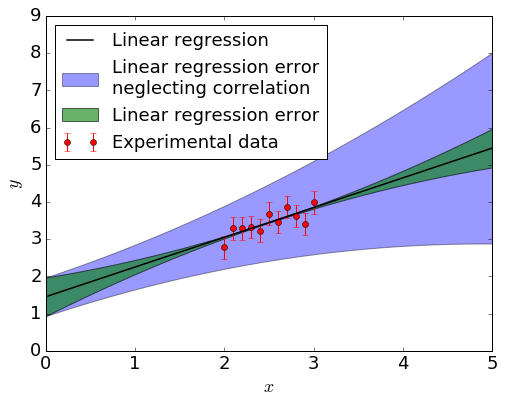

In [6]:
# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.errorbar(x_grid, lin_y, yerr=y_err_uncorr, label='Linear regression\nneglecting correlation')
#ax.errorbar(x_grid, lin_y,yerr=y_errors, label='Linear regression')
ax.fill_between(x_grid, lin_y-y_err_uncorr, lin_y+y_err_uncorr, facecolor='b', alpha=0.4,
                label='Linear regression error\nneglecting correlation')
ax.fill_between(x_grid, lin_y-y_errors, lin_y+y_errors, facecolor='g', alpha=0.6, label='Linear regression error')
ax.errorbar(x_ex1, y_ex1, np.ones(len(x_ex1))*sigma_ex1, fmt='ro', label='Experimental data')
ax.plot(x_grid, lin_y, 'k', label='Linear regression', lw=1.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc=2)

### Exercise 1.2
Verify the results of exercise 1 with the following numerical simulation:
1. For each $x_i$ generate a random $y_i$ with a Gaussian distribution $N(a_1+a_2x_i,\sigma^2)$.
2. Fit the new data and predict the $y$ for $x=0.5$.
3. Repeat the steps above 1000 times and construct a histogram with the values of $y(0.5)$. Obtain the standard deviation and compare it with the value from exercise 1

In [7]:
m = 2000
y_prime = np.random.normal(a1_ex1+a2_ex1*x_ex1, sigma_ex1, (m,len(x_ex1)))
S_yp = np.sum(y_prime, axis=1)
S_xyp = np.sum(x_ex1*y_prime, axis=1)
a1_vec = (S_x2*S_yp - S_x*S_xyp)/Delta
a2_vec = (N*S_xyp - S_x*S_yp)/Delta
y_values = a1_vec+a2_vec*x_value
mu_value = np.mean(y_values)
sigma_value = np.std(y_values)
print 'The estimatied value of y(%g) has mean = %f and std = %f' %(x_value, mu_value, sigma_value)
print 'The linear regression value of y(%g) has value = %f and estimated error = %f' %(x_value,
                                                                                       a1_ex1+a2_ex1*x_value,
                                                                                       y_error)

The estimatied value of y(5) has mean = 5.454215 and std = 0.730564
The linear regression value of y(5) has value = 5.447727 and estimated error = 0.720795


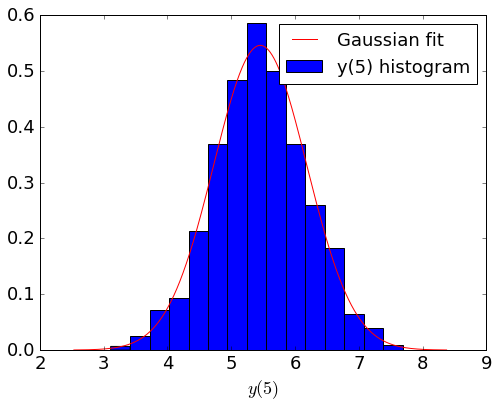

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(y_values, bins=15, normed = 1, label='y(%g) histogram' %x_value)
dist = stat.norm(mu_value, sigma_value)
x_pdf = np.linspace(mu_value-4.*sigma_value, mu_value+4*sigma_value, 1000)
ax.plot(x_pdf, dist.pdf(x_pdf),'r', label='Gaussian fit')
ax.set_xlabel('$y(%g)$' %x_value)
ax.legend(loc=0)

## 2.Maximum likelihood and least squares
### Exercise 2.1
Find the maximum likelihood estimators for the mean and the variance of a Gaussian distribution, and obtain the covariance matrix from the second derivatives of the likelihood

$$
L(\vec{x};\mu,\sigma)=\prod_{i=1}^N f(x_i;\mu,\sigma)
$$
Thus, the log-likelihood is:
$$
l(\vec{x};\mu,\sigma)=-2\log L(\vec{x};\mu,\sigma)= n\log (2\pi) +n\log (\sigma^2) + \frac{1}{\sigma^2}\sum_{i=1}^n (x_i-\mu)^2
$$
Therefore, the ML estimator of $\mu$ and $\sigma$ will be the values that minimize $l(\vec{x};\mu,\sigma)$ derivatives with respect to $\mu$ and $\sigma$ respectively:
$$
\frac{\partial l(\vec{x};\mu,\sigma)}{\partial \mu}\Big\rvert_{\mu=\mu_{ML}}=0=\frac{1}{\sigma^2}\sum_{i=1}^n 2(x_i-\mu_{ML})(-1) \quad \rightarrow \quad 0=\sum_{i=1}^n (x_i-\mu_{ML})=\sum_{i=1}^n (x_i)-n\mu_{ML} \\
\Rightarrow \mu_{ML}=\frac{1}{n}\sum_{i=1}^n x_i \\
\frac{\partial l(\vec{x};\mu,\sigma)}{\partial \sigma}\Big\rvert_{\sigma=\sigma_{ML}}=0=n\frac{2}{\sigma_{ML}}+\frac{-2}{\sigma_{ML}^3}\sum_{i=1}^n (x_i-\mu)^2 \quad \rightarrow \quad \frac{n}{\sigma_{ML}}=\frac{1}{\sigma_{ML}^3}\sum_{i=1}^n (x_i-\mu)^2 \\
\Rightarrow \sigma_{ML}^2 = \frac{1}{n}\sum_{i=1}^n (x_i-\mu)^2
$$

### Exercise 2.2
Generate 2000 random numbers, $\{y_i\}$, following $f(x)=1+a_1x+a_2x^2$, using $a_1=0.5$,  $a_2=0.5$, for $-1\leq x \leq 1$. Use these data to perform a likelihood fit to estimate $a_1$,$a_2$. Draw the associated contour plots together with the real value of the estimate.

$$
f(x)=1+a_1x+a_2x^2 \\ \rightarrow \quad F(x)=\int_{-1}^x f(x) dx = x+\frac{a_1}{2}x^2+\frac{a_2}{3}x^3-(-1+\frac{a_1}{2}-\frac{a_2}{3})=(x+1)+\frac{a_1}{2}(x^2-1)+\frac{a_2}{3}(x^3+1)=\\ =(x+1)+\frac{a_1}{2}(x-1)(x+1)+\frac{a_2}{3}(x+1)(x^2-x+1)
$$

Note that $F(1)=2+\frac{2}{3}a_2$ instead of $1$ which is what it should be due to $x\in [-1,1]$. Therefore, the pdf is not normalized. To solve this, we normalize both the pdf and the cdf dividing by the factor $2+\frac{2}{3}a_2$.

##### Likelihod fit
$$
L(\vec{x};a_1,a_2)=\prod_{i=1}^N f(x_i;a_1,a_2)=\prod_{i=1}^N \frac{1+a_1x_i+a_2x_i^2}{2+\frac{2}{3}a_2}
$$
Thus, the log-likelihood is:
$$
l(\vec{x};a_1,a_2)=-2\log L(\vec{x};a_1,a_2)=-2\sum_{i=1}^n \log (f(x_i;a_1,a_2))=2\sum_{i=1}^n (2+\frac{2}{3}a_2)-2\sum_{i=1}^n \log(1+a_1x_i+a_2x_i^2)= \\
4n(1+\frac{1}{3}a_2)-2\sum_{i=1}^n \log(1+a_1x_i+a_2x_i^2)
$$

Therefore, we derivate to find the ML estimators as they have to minimize $l(\vec{x};a_1,a_2)$:
$$
\frac{\partial l(\vec{x};a_1,a_2)}{\partial a_1}\Big\rvert_{a_1=a_1^{ML}}=0=-2\sum_{i=1}^n \frac{x_i}{1+a_1^{ML}x_i+a_2^{ML}x_i^2}
$$
$$
\frac{\partial l(\vec{x};a_1,a_2)}{\partial a_2}\Big\rvert_{a_2=a_2^{ML}}=0=\frac{4}{3}n-2\sum_{i=1}^n \frac{x_i^2}{1+a_1^{ML}x_i+a_2^{ML}x_i^2}
$$
These equations are transcendental equations, but can easily be solved numerically in python using `scipy.optimize.fsolve`. Finally, to estimate the error of the estimator, we will use the expression  $l(\vec{x};a_1^{\sigma},a_2^{\sigma})=l(\vec{x};a_1^{ML},a_2^{ML})+1$. To estimate the error of $a_1$, $a_2=a_2^{ML}$ will be used and viceversa.

In [9]:
def pdf_3(x,a1,a2):
    y = (1+a1*x+a2*np.square(x))/(2.+2./3.*a2)
    return y

def cdf_3(x,a1,a2):
    P = (x+1)*(1+a1/2.*(x-1)+a2/3.*(x**2-x+1))/(2.+2./3.*a2)
    return P

def try_reject(fun,N,a,b,fmax,m,*fun_args):
    x=a+(b-a)*np.random.random(m*N)
    y=fmax*np.random.random(m*N)
    Xi=x[y<=fun(x,*fun_args)][:N]
    return Xi

def likelihood(sample,a1,a2):
    L = -2.*np.sum(np.log(pdf_3(sample,a1,a2)))
    return L

def d_likelihood(a,sample):
    a1=a[0]; a2=a[1]
    den=pdf_3(sample,a1,a2)
    d1=sum(sample/den)
    d2=2./3.*len(sample)-sum(np.square(sample)/den)
    d=np.array([d1,d2])
    return d

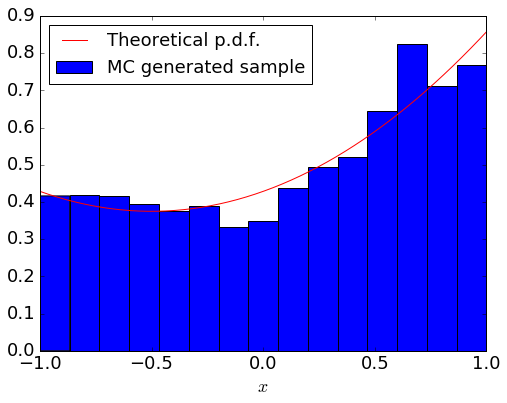

In [10]:
N = 2000
a1 = .5
a2 = .5
sample = try_reject(pdf_3,N,-1,1,.9,2,a1,a2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(sample,normed=1,bins=15,label='MC generated sample')
x_pdf = np.linspace(-1,1,200)
ax.plot(x_pdf,pdf_3(x_pdf,a1,a2),'r',label='Theoretical p.d.f.')
ax.legend(loc=0)
ax.set_xlabel('$x$')

In [11]:
# Estimate a1 and a2 using the derivatives of l, finding its roots numerically
a1_num,a2_num = opt.fsolve(d_likelihood,np.array([.4,.6]),args=(sample))
# Calculate the variances of a1 and a2 using the -log(L(mu+sigma))=-log(L(mu))+1
# which implies that l(mu+sigma)-l(mu)-1=0. Thus, finding the root of this equation 
# (implemented in a1_var and a2_var functions) will be an estimate of the standard deviation
Lmax = likelihood(sample,a1_num,a2_num)
a1_error = np.empty((2,1)) ; a2_error = np.empty((2,1))
a1_var = lambda a1 : likelihood(sample,a1,a2_num)-Lmax-1
a1_error[1] = opt.fsolve(a1_var,a1_num+.1)[0]-a1_num # + error
a1_error[0] = a1_num-opt.fsolve(a1_var,a1_num-.1)[0] # - error
a2_var = lambda a2 : likelihood(sample,a1_num,a2)-Lmax-1
a2_error[1] = opt.fsolve(a2_var,a2_num+.1)[0]-a2_num # + error
a2_error[0] = a2_num-opt.fsolve(a2_var,a2_num-.1)[0] # - error
print 'Propper ML estimate:\n\ta1=%.2g (-%.2g,+%.2g)\n\ta2=%.2g (-%.2g,+%.2g)' %(a1_num,a1_error[0],a1_error[1],
                                                                  a2_num,a2_error[0],a2_error[1])

Propper ML estimate:
	a1=0.53 (-0.049,+0.048)
	a2=0.68 (-0.1,+0.11)


In [12]:
n_grid = 51
a1_mesh = np.linspace(0,0.9,n_grid)
a2_mesh = np.linspace(0.1,1.1,n_grid)
a1_grid, a2_grid = np.meshgrid(a1_mesh, a2_mesh)
L = np.empty((n_grid,n_grid))
for i in xrange(n_grid):
    for j in xrange(n_grid):
        L[j,i]=likelihood(sample,a1_grid[j,i],a2_grid[j,i])

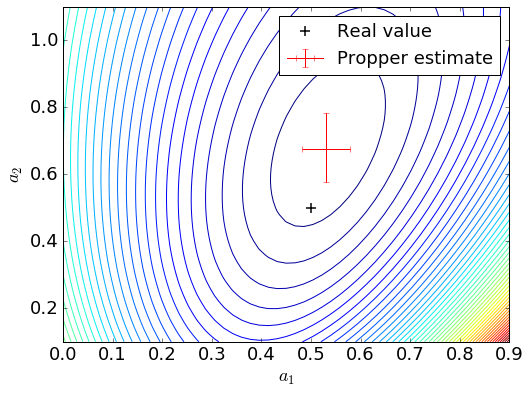

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(a1_grid,a2_grid,L,50)
ax.errorbar(a1_num,a2_num,xerr=a1_error,yerr=a2_error,color='r',label='Propper estimate')
ax.plot(a1,a2,'k+',markersize=10,mew=1.5,label='Real value')
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.legend(numpoints=1)

### Exercise 3.3
Repeat the $a_1$,$a_2$ likelihood fit for m different montecarlo generated samples in order to estimate the variance of $a_1^{ML}$ and $a_2^{ML}$.

In [14]:
m = 1000
a1_MCvec = np.empty(m)
a2_MCvec = np.empty(m)
for i in xrange(m):
    i_sample = try_reject(pdf_3,N,-1,1,.9,2,a1,a2)
    # Estimate a1 and a2 using the derivatives of l, finding its roots numerically
    a1_MCvec[i],a2_MCvec[i] = opt.fsolve(d_likelihood,np.array([.5,.5]),args=(i_sample))

In [15]:
print 'MC ML estimate:\n\ta1: mean=%.2g; std=%.2g\n\ta2: mean=%.2g; std=%.2g' %(np.mean(a1_MCvec),np.std(a1_MCvec),
                                                              np.mean(a2_MCvec),np.std(a2_MCvec))

MC ML estimate:
	a1: mean=0.5; std=0.053
	a2: mean=0.5; std=0.1
